# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [34]:
plt.rcParams.keys()

/home/anybody/miniconda3/envs/ds/lib/python3.8/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize': (15,6)})

In [41]:
data = pd.read_csv('../Data/13_data_1.csv')
data.tail()

,Datos
995,4.613314
996,4.188867
997,3.394737
998,6.384074
999,4.145870


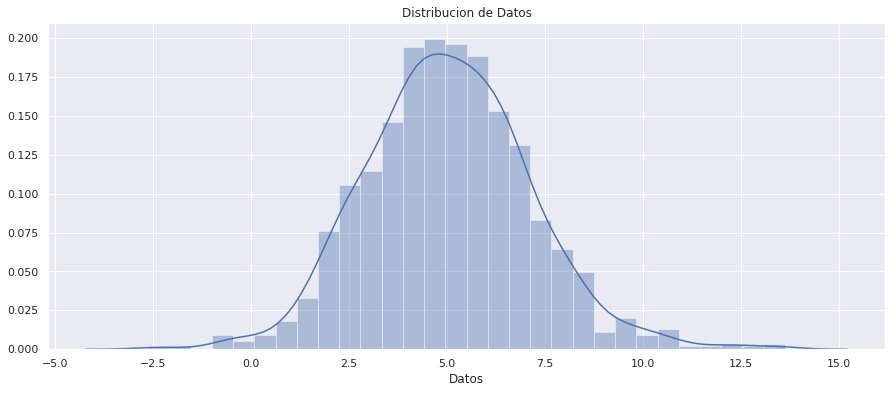

In [42]:
# Hacemos un displot para ver la distribucion de los datos
chart = sns.distplot(data.Datos)
chart.set_title('Distribucion de Datos');

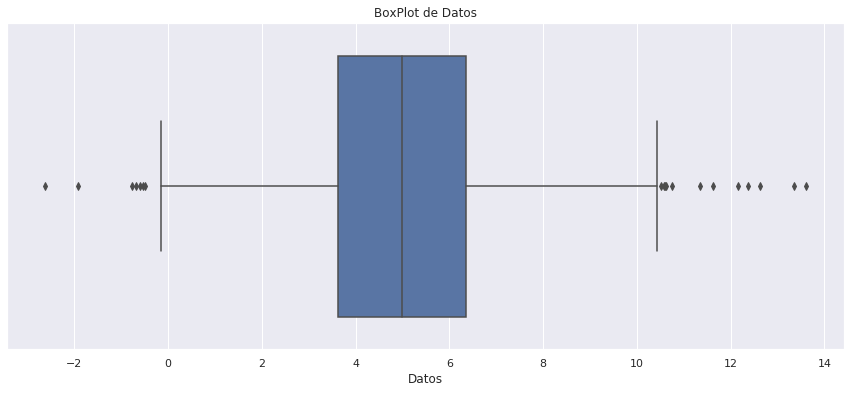

In [43]:
# Hacemos un boxplot para ver los rangos de valores
chart = sns.boxplot(data.Datos)
chart.set_title('BoxPlot de Datos');

#### Conclusion:
-  Vemos que los datos tienen una distribucion normal, y hay valores atipicos en ambos extremos del dominio

### 2. Reescaleo de datos

In [44]:
valor_medio_original = data.Datos.mean()
std_original = data.Datos.std()
print(f'Media original: {valor_medio_original:.3f}\nDesviacion standar original: {std_original:.3f}')

Media original: 5.026
Desviacion standar original: 2.106


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

data['Datos_Reescalados'] = scaler.transform(data)[:,0]
data.head()

,Datos,Datos_Reescalados
0,2.370556,-1.261298
1,3.437876,-0.754276
2,6.300131,0.605417
3,5.403170,0.179322
4,5.722120,0.330837


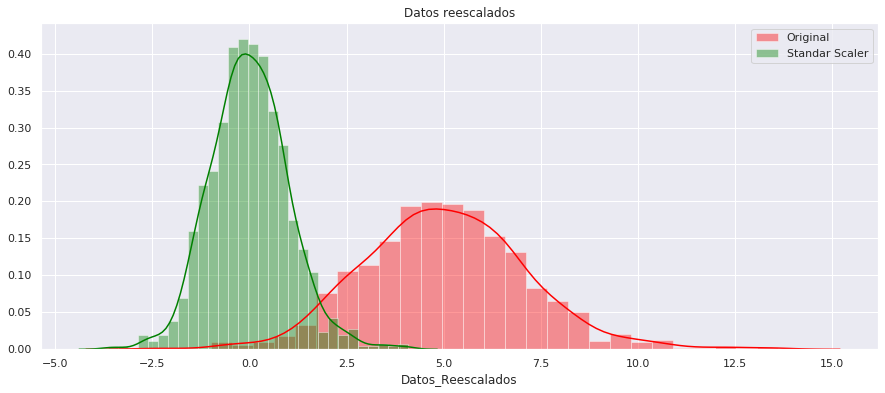

In [46]:
sns.distplot(data['Datos'], color='Red', label='Original')
chart = sns.distplot(data['Datos_Reescalados'], color='Green', label='Standar Scaler')
chart.set_title('Datos reescalados');
chart.legend();

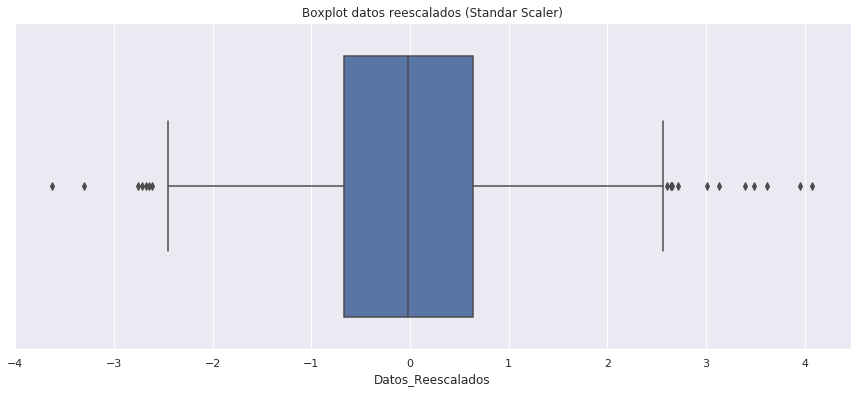

In [50]:
chart = sns.boxplot(data.Datos_Reescalados)
chart.set_title('Boxplot datos reescalados (Standar Scaler)');

### 3. Manejo de outliers

1. Rango intercuartílico.

In [65]:
data.sort_values(['Datos_Reescalados'], inplace=True)

q25, q75 = data['Datos_Reescalados'].quantile(0.25), data['Datos_Reescalados'].quantile(0.75)
iqr = q75 - q25 
minimo = q25 - iqr * 1.5
maximo = q75 + iqr * 1.5

print(f'q1: {q25:.3f}\nq3: {q75:.3f}\niqr: {iqr:.3f}\nmin: {minimo:.3f}\nmax: {maximo:.3f}')

q1: -0.664
q3: 0.634
iqr: 1.298
min: -2.611
max: 2.581


In [66]:
mascara_outliers = np.logical_or(minimo > data['Datos_Reescalados'], data['Datos_Reescalados'] > maximo)
mascara_outliers.sum()

19

2. Regla de las tres sigmas

In [67]:
mean = data['Datos_Reescalados'].mean()
std = data['Datos_Reescalados'].std()
minimo = mean - std * 3
maximo = mean + std * 3

print(f'mean: {mean:.3f}\nstd: {std:.3f}\nmin: {minimo:.3f}\nmax: {maximo:.3f}')

mean: 0.000
std: 1.001
min: -3.002
max: 3.002


In [68]:
mascara_outliers = np.logical_or(minimo > data['Datos_Reescalados'], data['Datos_Reescalados'] > maximo)
mascara_outliers.sum()

9

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?
-  Si